
# Generated Data Extrapolation


In this example you will be generating some example data and extrapolate this
using the basic potential extrapolator.


You can start by importing the necessary module components.


In [1]:
# Module imports
from solarbextrapolation.map3dclasses import Map3D
#from solarbextrapolation.potential_field_extrapolator import PotentialExtrapolator
from solarbextrapolation.extrapolators import PotentialExtrapolator
from solarbextrapolation.example_data_generator import generate_example_data, dummyDataToMap
#from solarbextrapolation.visualisation_functions import visualise

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/sunpy-0.7.dev6442-py2.7-linux-x86_64.egg/sunpy/visualization/wcsaxes_compat.py:17: UserWarning: SunPy plotting is improved by installing the WCSAxes module: http://wcsaxes.readthedocs.org/en/latest/index.html
  warnings.warn("SunPy plotting is improved by installing the WCSAxes module: http://wcsaxes.readthedocs.org/en/latest/index.html")


You also need the ability to convert astropyunits and use MayaVi for
visualisation.


In [2]:
# General imports
import astropy.units as u
#from mayavi import mlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You are going to try and define a 3D cuboid grid of 20x22x20 with ranges in
arcseconds, these parameters can be stored in the following lists and astropy
quantities.


In [149]:
# Input parameters:
arr_grid_shape = [ 20, 22, 20 ]         # [ y-size, x-size ]
yrange = u.Quantity([ -10.0, 10.0 ] * u.arcsec)
xrange = u.Quantity([ -11.0, 11.0 ] * u.arcsec)
zrange = u.Quantity([ 0,     20.0 ] * u.arcsec)

The generated data will consist of a 2D space with 2 Gaussian spots, one
positive and one negative, on a background of 0.0.
solarbextrapolation.example_data_generator provides many ways to achieve this,
including letting it randomly generate the position, magnitude and size of
each spot.
In this case you will manually define the parameters of each spot as a list,
using percentage units so that the spots will be inside the given ranges of
any generated data:


In [215]:
# Manual Pole Details
#arrA# = [ position, size, maximum strength ]
arrA0 = [ u.Quantity([ 25, 25 ] * u.percent), 25.0 * u.percent,  .5 * u.T ]
arrA1 = [ u.Quantity([ 75, 75 ] * u.percent), 25.0 * u.percent, -.5 * u.T ]

You generate the data using generate_example_data(...) and create a map with
this using dummyDataToMap(...).


In [216]:
# Generate the data and make into a map
arr_data = generate_example_data(arr_grid_shape[0:2], xrange, yrange,arrA0, arrA1)
map_boundary = dummyDataToMap(arr_data, xrange, yrange)

You can check the resulting generated data by using peek().


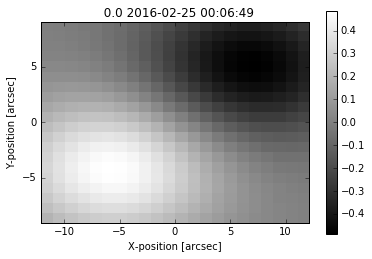

In [217]:
map_boundary.peek()

You now simply want to extrapolate using this boundary data, this is achieved
by first creating a potential extrapolator object and then by running the
extrapolate on this to return a Map3D object with the resulting vector field.


In [218]:
# Use potential extrapolator to generate field
aPotExt = PotentialExtrapolator(map_boundary, zshape=arr_grid_shape[2], zrange=zrange)
aMap3D  = aPotExt.extrapolate(enable_numba=True)

# The Extrapolations run time is stored in the meta
floSeconds = np.round(aMap3D.meta['extrapolator_duration'],3)
print('\nextrapolation duration: ' + str(floSeconds) + ' s\n')

False

extrapolation duration: 0.219 s



/opt/anaconda3/envs/py27/lib/python2.7/site-packages/sunpy-0.7.dev6442-py2.7-linux-x86_64.egg/sunpy/map/mapbase.pyc:133: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  


Note that you used enable_numba=True to speed up the computation on systems
with Anaconda numba installed.


In [219]:
aMap3D.meta

{'boundary_1_meta': MapMeta([('rsun_ref', 696000000),
          ('naxis', 2),
          ('naxis2', 20),
          ('crval2', 0.0),
          ('crpix1', 11.5),
          ('t_obs', '2016-02-24T18:06:48.441209'),
          ('crpix2', 10.5),
          ('naxis1', 8),
          ('cdelt1', 1.1),
          ('cdelt2', 0.9090909090909091),
          ('crval1', 0.0),
          ('datavals', 400),
          ('dsun_ref', 149597870691),
          ('cunit1', 'arcsec'),
          ('bunit', 'Tesla'),
          ('bitpix', 64),
          ('cunit2', 'arcsec'),
          ('datamin', -0.4871832464436669),
          ('datamax', 0.4871832464436669)]),
 'cdelt1': 1.2100000000000002,
 'cdelt2': 0.8264462809917354,
 'cdelt3': 1.0,
 'cunit1': Unit("arcsec"),
 'cunit2': Unit("arcsec"),
 'cunit3': Unit("arcsec"),
 'extrapolator_duration': 0.21888208389282227,
 'extrapolator_duration_unit': Unit("s"),
 'extrapolator_notes': '',
 'extrapolator_routine': 'Potential Field Extrapolator',
 'extrapolator_start_time': '2016

You can now get a quick and easy visualisation using the
solarbextrapolation.example_data_generator.visualise tools:


In [220]:
# Visualise the 3D vector field
#fig = visualise(aMap3D,
#                boundary=map_boundary,
#                volume_units=[1.0*u.arcsec, 1.0*u.arcsec, 1.0*u.Mm],
#                show_boundary_axes=False,
#                boundary_units=[1.0*u.arcsec, 1.0*u.arcsec],
#                show_volume_axes=True,
#                debug=False)
#mlab.show()

Note that the parameters here are simply to decide what boundary ranges
to display.


Can we use `yt` to try and visualize this data as well?

In [221]:
import yt
from yt.visualization.api import Streamlines

In [222]:
data_yt = dict(field_x=(aMap3D.data[:,:,:,1],str(u.T)),
               field_y=(aMap3D.data[:,:,:,0],str(u.T)),
               field_z=(aMap3D.data[:,:,:,2],str(u.T)))
bbox = np.array([xrange,yrange,zrange])
ds = yt.load_uniform_grid(data_yt,aMap3D.data[:,:,:,0].shape,length_unit="arcsec",bbox=bbox)

yt : [INFO     ] 2016-02-24 18:06:57,927 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-02-24 18:06:57,927 Parameters: domain_dimensions         = [20 22 20]
yt : [INFO     ] 2016-02-24 18:06:57,928 Parameters: domain_left_edge          = [-11. -10.   0.]
yt : [INFO     ] 2016-02-24 18:06:57,928 Parameters: domain_right_edge         = [ 11.  10.  20.]
yt : [INFO     ] 2016-02-24 18:06:57,929 Parameters: cosmological_simulation   = 0.0


First, let's try out a slice plot.

yt : [INFO     ] 2016-02-24 18:06:59,460 Loading field plugins.
yt : [INFO     ] 2016-02-24 18:06:59,460 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,461 Loaded astro (15 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,461 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,462 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,463 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,463 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,464 Loaded local (112 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,464 Loaded magnetic_field (120 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,464 Loaded my_plugins (120 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,465 Loaded species (122 new fields)
yt : [INFO     ] 2016-02-24 18:06:59,553 xlim = -11.000000 11.000000
yt : [INFO     ] 2016-02-24 18:06:59,554 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-02-24 18:06:59,555 xlim = -11.


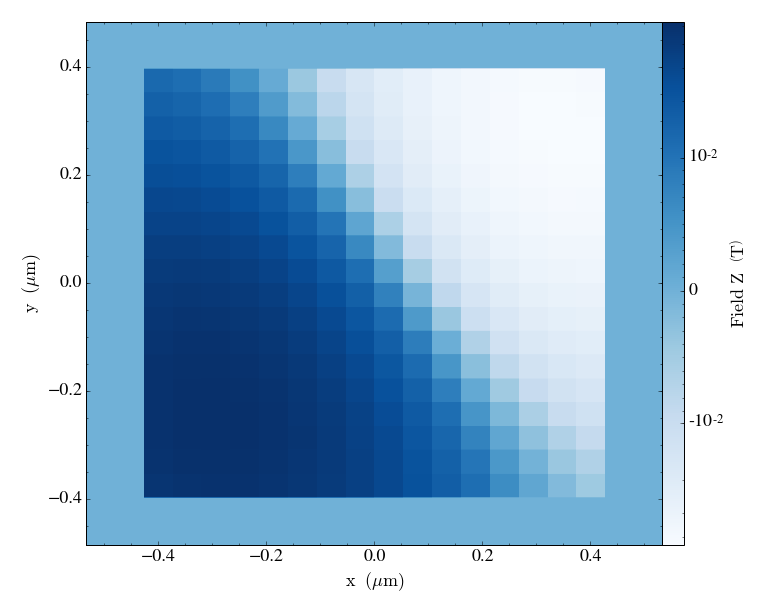

In [223]:
slc = yt.SlicePlot(ds, "z", ["field_z"])
slc.set_cmap("field_z", "Blues")
slc.annotate_grids(cmap=None)
slc.show()

This is not that informative. What about a Streamline plot?

In [224]:
from mpl_toolkits.mplot3d import Axes3D

In [233]:
#come up with initial positions of the field lines
q3 = ds.domain_center
num_seed_points = map_boundary.data.shape[0]*map_boundary.data.shape[1]
scale = ds.domain_width
seed_dx = 0.9*np.ones((num_seed_points,np.shape(q3)[0]))*scale/2.
seed_points = q3 + seed_dx
seed_points[:,2] = 0.

In [234]:
seed_points

YTArray([[ 9.9,  9. ,  0. ],
       [ 9.9,  9. ,  0. ],
       [ 9.9,  9. ,  0. ],
       ..., 
       [ 9.9,  9. ,  0. ],
       [ 9.9,  9. ,  0. ],
       [ 9.9,  9. ,  0. ]]) code_length

In [235]:
streamlines = Streamlines(ds,seed_points,xfield='field_x',yfield='field_y',zfield='field_z')

yt : [INFO     ] 2016-02-24 18:10:41,957 AMRKDTree rebuilt, Final Volume: 8.800000e+03


In [236]:
streamlines.integrate_through_volume()

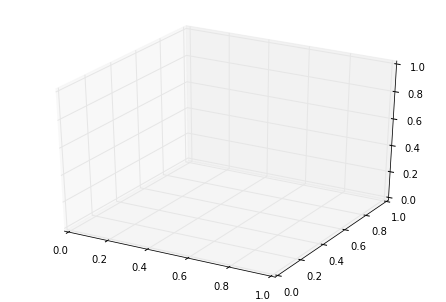

In [237]:
fig = plt.figure()
ax = Axes3D(fig)
for stream in streamlines.streamlines:
    stream = stream[np.all(stream != 0.0, axis=1)]
    ax.plot3D(stream[:,0], stream[:,1], stream[:,2], alpha=0.5)

Maybe try a quiver plot. Need to make the x,y,z matrices.

In [135]:
zero_inds = np.where((np.fabs(aMap3D.data[:,:,:,1])>1e-3))
xgrid = np.linspace(xrange.value[0],xrange.value[1],aMap3D.data.shape[1])
ygrid = np.linspace(yrange.value[0],yrange.value[1],aMap3D.data.shape[0])
zgrid = np.linspace(zrange.value[0],zrange.value[1],aMap3D.data.shape[2])
xgrid,ygrid,zgrid = np.meshgrid(xgrid,ygrid,zgrid)

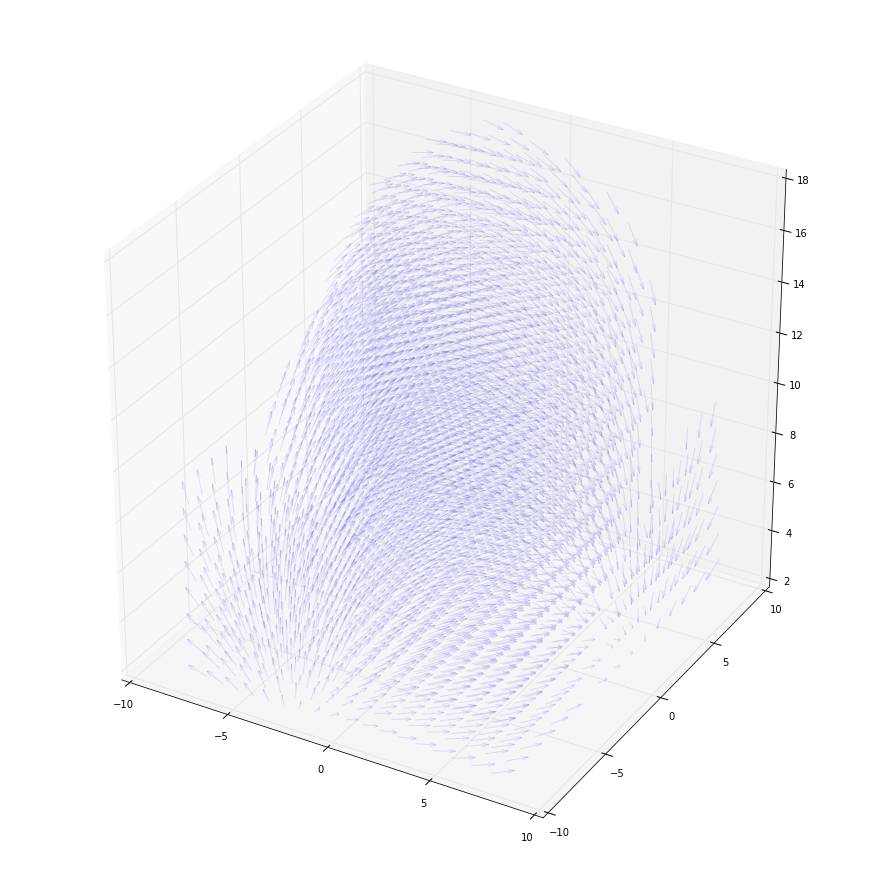

In [136]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.quiver3D(xgrid[zero_inds],ygrid[zero_inds],zgrid[zero_inds],
            aMap3D.data[:,:,:,1][zero_inds],aMap3D.data[:,:,:,0][zero_inds],aMap3D.data[:,:,:,2][zero_inds],alpha=0.1,)